In [104]:
import pandas as pd
import numpy as np
import itertools

**There are Two Machine Learning Modeling: 1. Models to predict the delivery time from origin to destination with other information (using Supervised Learning and Deep Learning), 2. Models to forecast the amount of order per days (Time Series Modeling)**

# Preprocessing Data

In [27]:
#Convert dictionary to dataframe
df = pd.DataFrame.from_dict(data_json)
df

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc..."
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
2,"{'lon': 109.999733, 'lat': -7.8497773}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc..."
...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,NaN,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc..."
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,NaN,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai..."
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,NaN,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc..."
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai..."


In [35]:
#Splitting dictionary in columns
locations = df['taskLocationDone'].apply(pd.Series)
codd = df['cod'].apply(pd.Series)
uservariables = df['UserVar'].apply(pd.Series)
data = pd.concat([df,locations,codd,uservariables], axis=1)
data

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar,lon,...,received,0,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc...",109.762910,...,True,NaN,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.033986,...,True,NaN,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,"{'lon': 109.999733, 'lat': -7.8497773}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",109.999733,...,True,NaN,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.003708,...,True,NaN,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.013887,...,True,NaN,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,NaN,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc...",0.000000,...,NaN,NaN,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,NaN,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai...",110.352054,...,NaN,NaN,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,COLF02
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,NaN,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc...",105.664897,...,NaN,NaN,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai...",119.877173,...,False,NaN,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK,COLF02


In [36]:
#Check Missing Values
pd.set_option('display.max_rows',500)
print("Total Missing Value:", data.isna().sum().sum())
print("\nThe count of missing value in each column:\n", data.isna().sum())

Total Missing Value: 41062

The count of missing value in each column:
 taskLocationDone          768
taskCreatedTime             0
cod                      5976
taskAssignedTo              1
taskCompletedTime         768
taskStatus                  0
flow                        0
taskId                      0
UserVar                     0
lon                       768
lat                       768
0                        8334
amount                   5976
received                 5976
0                        8334
branch_dest                 0
taskStatusLabel           762
receiver_city              52
taskDetailStatusLabel     762
taskDetailStatus          762
weight                      0
branch_origin             293
taskStatus                762
dtype: int64


In [37]:
#Covert str to datetime --> delete missing value of taskCompletedTime first before covert to datetime
data = data.dropna(subset = ['taskCompletedTime'])

In [57]:
from datetime import datetime, timezone

#convert string to 
data['taskCompletedTime2'] = pd.to_datetime(data['taskCompletedTime'])
data['taskCreatedTime2'] = pd.to_datetime(data['taskCreatedTime'])

#Remove utc offset because haven't found the function to calculate difference between two datetime with utc offset, however..
#I will adjust the timezone after calculate difference time
def removeutcoff(date):
    date_rem = date.replace(tzinfo=None)
    return date_rem

data['taskCompletedTime2'] = data['taskCompletedTime2'].apply(removeutcoff)
data['taskCreatedTime2'] = data['taskCreatedTime2'].apply(removeutcoff)
data

C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\1670778761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['taskCompletedTime2'] = pd.to_datetime(data['taskCompletedTime'])
C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\1670778761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['taskCreatedTime2'] = pd.to_datetime(data['taskCreatedTime'])
C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\1670778761.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar,lon,...,branch_dest,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus,taskCompletedTime2,taskCreatedTime2
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc...",109.762910,...,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01,2022-11-01 20:46:30,2022-11-01 20:17:26
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.033986,...,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01,2022-11-01 12:33:48,2022-11-01 08:41:07
2,"{'lon': 109.999733, 'lat': -7.8497773}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",109.999733,...,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,2022-11-01 13:41:57,2022-11-01 08:41:07
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.003708,...,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,2022-11-01 18:18:19,2022-11-01 08:41:07
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.013887,...,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,2022-11-01 10:51:49,2022-11-01 08:41:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,NaN,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc...",0.000000,...,CGK,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01,2022-11-10 09:38:04,2022-11-10 09:07:12
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,NaN,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai...",110.352054,...,JOG,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,COLF02,2022-11-10 09:37:52,2022-11-10 09:21:42
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,NaN,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc...",105.664897,...,TKG,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01,2022-11-10 09:37:55,2022-11-10 09:36:44
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai...",119.877173,...,KOE,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK,COLF02,2022-11-10 10:37:53,2022-11-10 07:25:40


In [59]:
#Creating time needed to completed delivery
data['time_deliv'] = data['taskCompletedTime2']-data['taskCreatedTime2']
data

C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\812243979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_deliv'] = data['taskCompletedTime2']-data['taskCreatedTime2']


,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar,lon,...,taskStatusLabel,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus,taskCompletedTime2,taskCreatedTime2,time_deliv
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc...",109.762910,...,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01,2022-11-01 20:46:30,2022-11-01 20:17:26,0 days 00:29:04
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.033986,...,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01,2022-11-01 12:33:48,2022-11-01 08:41:07,0 days 03:52:41
2,"{'lon': 109.999733, 'lat': -7.8497773}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",109.999733,...,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,2022-11-01 13:41:57,2022-11-01 08:41:07,0 days 05:00:50
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.003708,...,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,2022-11-01 18:18:19,2022-11-01 08:41:07,0 days 09:37:12
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.013887,...,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,2022-11-01 10:51:49,2022-11-01 08:41:07,0 days 02:10:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,NaN,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc...",0.000000,...,Success,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01,2022-11-10 09:38:04,2022-11-10 09:07:12,0 days 00:30:52
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,NaN,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai...",110.352054,...,Failed,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,COLF02,2022-11-10 09:37:52,2022-11-10 09:21:42,0 days 00:16:10
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,NaN,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc...",105.664897,...,Success,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01,2022-11-10 09:37:55,2022-11-10 09:36:44,0 days 00:01:11
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai...",119.877173,...,Failed,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK,COLF02,2022-11-10 10:37:53,2022-11-10 07:25:40,0 days 03:12:13


In [60]:
#Converting datetime to minutes
def datetimetominutes(date):
    minutess = int(date.total_seconds() / 60)
    return minutess

data['time_minutes_deliv'] = data['time_deliv'].apply(datetimetominutes)
data

C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\2853645971.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_minutes_deliv'] = data['time_deliv'].apply(datetimetominutes)


,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar,lon,...,receiver_city,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus,taskCompletedTime2,taskCreatedTime2,time_deliv,time_minutes_deliv
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc...",109.762910,...,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01,2022-11-01 20:46:30,2022-11-01 20:17:26,0 days 00:29:04,29
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.033986,...,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01,2022-11-01 12:33:48,2022-11-01 08:41:07,0 days 03:52:41,232
2,"{'lon': 109.999733, 'lat': -7.8497773}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",109.999733,...,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,2022-11-01 13:41:57,2022-11-01 08:41:07,0 days 05:00:50,300
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.003708,...,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,2022-11-01 18:18:19,2022-11-01 08:41:07,0 days 09:37:12,577
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.013887,...,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01,2022-11-01 10:51:49,2022-11-01 08:41:07,0 days 02:10:42,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,NaN,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc...",0.000000,...,"PALMERAH ,JAKARTA BA",ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01,2022-11-10 09:38:04,2022-11-10 09:07:12,0 days 00:30:52,30
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,NaN,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai...",110.352054,...,KOTA BANTUL,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,COLF02,2022-11-10 09:37:52,2022-11-10 09:21:42,0 days 00:16:10,16
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,NaN,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc...",105.664897,...,MARGA SEKAMPUNG KAB.,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01,2022-11-10 09:37:55,2022-11-10 09:36:44,0 days 00:01:11,1
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai...",119.877173,...,"KOMODO,LABUAN BAJO",PENERIMA PINDAH ALAMAT,U03,0.6,CGK,COLF02,2022-11-10 10:37:53,2022-11-10 07:25:40,0 days 03:12:13,192


In [61]:
#convert to excel
#data.to_excel(r'C:\\Users\\aisah\\OneDrive\\Documents\\Data Science\\Data Science Test\\MileApp\\data-task-sample-main\\data_sample_excel2.xlsx', header=True)

#Insight Kenapa bisa failed
#Modeling prediksi waktu kirim dari titik awal ke titik destinasi
#Mapping persebaran failed kebanyakan dimana aja
#Forecasting banyaknya kiriman per hari

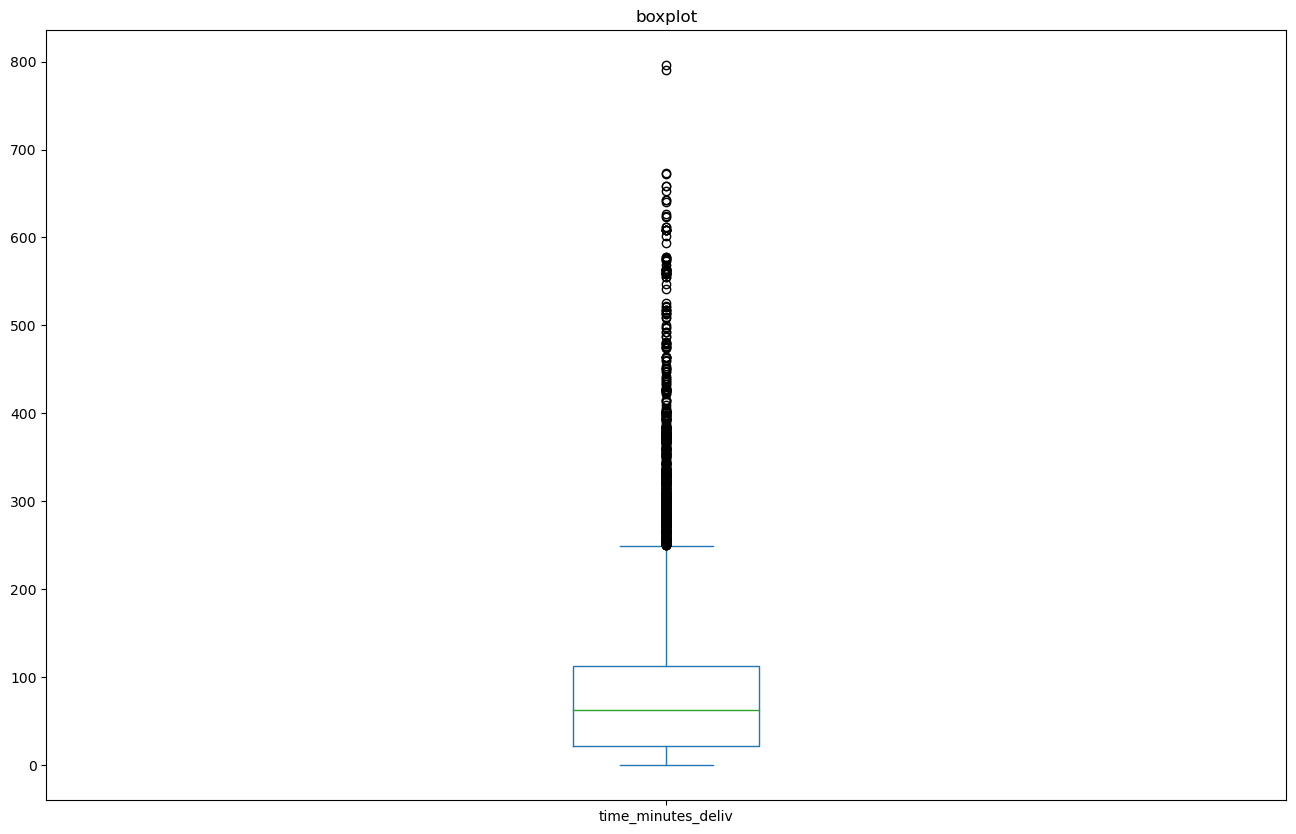

In [62]:
#Check distribution time delivery
import seaborn as sns
import matplotlib.pyplot as plt

#Detecting Outlier using BoxPlot of Time Window of Created dan Complete
plt.rcParams["figure.figsize"] = [16,10]
ax = data[['time_minutes_deliv']].plot(kind='box', title='boxplot')
plt.show() #from the boxplot we know the outliers are exist

The boxplot graph shows that there are many outliers due to the difference of timezone in **taskCompletedTime** so that we adjust the the timedeliv, if timezone **taskCompletedTime** +8000 then timedelive -60 minutes, and if timezone **taskCompletedTime** +9000 then timedelive -120 minutes.

In [67]:
data['utcoffset_taskCompletedTime']=data['taskCompletedTime'].str.slice(20,25)
data

C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\699053010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['utcoffset_taskCompletedTime']=data['taskCompletedTime'].str.slice(20,25)


,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar,lon,...,taskDetailStatusLabel,taskDetailStatus,weight,branch_origin,taskStatus,taskCompletedTime2,taskCreatedTime2,time_deliv,time_minutes_deliv,utcoffset_taskCompletedTime
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc...",109.762910,...,YANG BERSANGKUTAN,D01,13,CGK,COLF01,2022-11-01 20:46:30,2022-11-01 20:17:26,0 days 00:29:04,29,+0700
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.033986,...,YANG BERSANGKUTAN,D01,1.3,CGK,COLF01,2022-11-01 12:33:48,2022-11-01 08:41:07,0 days 03:52:41,232,+0700
2,"{'lon': 109.999733, 'lat': -7.8497773}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",109.999733,...,YANG BERSANGKUTAN,D01,3,CGK,COLF01,2022-11-01 13:41:57,2022-11-01 08:41:07,0 days 05:00:50,300,+0700
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.003708,...,YANG BERSANGKUTAN,D01,0.625,CGK,COLF01,2022-11-01 18:18:19,2022-11-01 08:41:07,0 days 09:37:12,577,+0700
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.013887,...,YANG BERSANGKUTAN,D01,3,CGK,COLF01,2022-11-01 10:51:49,2022-11-01 08:41:07,0 days 02:10:42,130,+0700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,NaN,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc...",0.000000,...,ATASAN/STAFF/KARYAWAN/BAWAHAN,D10,1,CGK,COLF01,2022-11-10 09:38:04,2022-11-10 09:07:12,0 days 00:30:52,30,+0700
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,NaN,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai...",110.352054,...,ALAMAT TIDAK LENGKAP service/ TIDAK DIKENAL,U01,1,TGR,COLF02,2022-11-10 09:37:52,2022-11-10 09:21:42,0 days 00:16:10,16,+0700
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,NaN,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc...",105.664897,...,YANG BERSANGKUTAN,D01,1.44,CGK,COLF01,2022-11-10 09:37:55,2022-11-10 09:36:44,0 days 00:01:11,1,+0700
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai...",119.877173,...,PENERIMA PINDAH ALAMAT,U03,0.6,CGK,COLF02,2022-11-10 10:37:53,2022-11-10 07:25:40,0 days 03:12:13,192,+0800


In [79]:
#Split date in taskCreatedTime2 for preparing forecasting count of order
def getdate(dateee):
    only_date = dateee.date()
    return only_date

data['taskCreated_date'] = data['taskCreatedTime2'].apply(getdate)
data

C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\747093450.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['taskCreated_date'] = data['taskCreatedTime2'].apply(getdate)


,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar,lon,...,branch_origin,taskStatus,taskCompletedTime2,taskCreatedTime2,time_deliv,time_minutes_deliv,utcoffset_taskCompletedTime,time_deliv_adjust,time_minutes_deliv_adjust,taskCreated_date
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc...",109.762910,...,CGK,COLF01,2022-11-01 20:46:30,2022-11-01 20:17:26,0 days 00:29:04,29,+0700,29,29,2022-11-01
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.033986,...,CGK,COLF01,2022-11-01 12:33:48,2022-11-01 08:41:07,0 days 03:52:41,232,+0700,232,232,2022-11-01
2,"{'lon': 109.999733, 'lat': -7.8497773}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",109.999733,...,CGK,COLF01,2022-11-01 13:41:57,2022-11-01 08:41:07,0 days 05:00:50,300,+0700,300,300,2022-11-01
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.003708,...,CGK,COLF01,2022-11-01 18:18:19,2022-11-01 08:41:07,0 days 09:37:12,577,+0700,577,577,2022-11-01
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.013887,...,CGK,COLF01,2022-11-01 10:51:49,2022-11-01 08:41:07,0 days 02:10:42,130,+0700,130,130,2022-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,NaN,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc...",0.000000,...,CGK,COLF01,2022-11-10 09:38:04,2022-11-10 09:07:12,0 days 00:30:52,30,+0700,30,30,2022-11-10
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,NaN,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai...",110.352054,...,TGR,COLF02,2022-11-10 09:37:52,2022-11-10 09:21:42,0 days 00:16:10,16,+0700,16,16,2022-11-10
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,NaN,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc...",105.664897,...,CGK,COLF01,2022-11-10 09:37:55,2022-11-10 09:36:44,0 days 00:01:11,1,+0700,1,1,2022-11-10
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai...",119.877173,...,CGK,COLF02,2022-11-10 10:37:53,2022-11-10 07:25:40,0 days 03:12:13,192,+0800,132,132,2022-11-10


In [69]:
data['time_minutes_deliv_adjust'] = np.where(data['utcoffset_taskCompletedTime']=='+0800',data['time_minutes_deliv']-60,
                                    np.where(data['utcoffset_taskCompletedTime']=='+0900',data['time_minutes_deliv']-120,data['time_minutes_deliv']))
data

C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3767219339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['time_minutes_deliv_adjust'] = np.where(data['utcoffset_taskCompletedTime']=='+0800',data['time_minutes_deliv']-60,


,taskLocationDone,taskCreatedTime,cod,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,UserVar,lon,...,weight,branch_origin,taskStatus,taskCompletedTime2,taskCreatedTime2,time_deliv,time_minutes_deliv,utcoffset_taskCompletedTime,time_deliv_adjust,time_minutes_deliv_adjust
0,"{'lon': 109.7629103, 'lat': -6.9266078}",2022-11-01 20:17:26 +0700,"{'amount': 685000, 'received': True}",pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,"{'branch_dest': 'SRG', 'taskStatusLabel': 'Suc...",109.762910,...,13,CGK,COLF01,2022-11-01 20:46:30,2022-11-01 20:17:26,0 days 00:29:04,29,+0700,29,29
1,"{'lon': 110.0339859, 'lat': -7.8761542}",2022-11-01 08:41:07 +0700,"{'amount': 53500, 'received': True}",peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.033986,...,1.3,CGK,COLF01,2022-11-01 12:33:48,2022-11-01 08:41:07,0 days 03:52:41,232,+0700,232,232
2,"{'lon': 109.999733, 'lat': -7.8497773}",2022-11-01 08:41:07 +0700,"{'amount': 179500, 'received': True}",peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",109.999733,...,3,CGK,COLF01,2022-11-01 13:41:57,2022-11-01 08:41:07,0 days 05:00:50,300,+0700,300,300
3,"{'lon': 110.0037077, 'lat': -7.710998}",2022-11-01 08:41:07 +0700,"{'amount': 31815, 'received': True}",peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.003708,...,0.625,CGK,COLF01,2022-11-01 18:18:19,2022-11-01 08:41:07,0 days 09:37:12,577,+0700,577,577
4,"{'lon': 110.0138869, 'lat': -7.8297416}",2022-11-01 08:41:07 +0700,"{'amount': 144562, 'received': True}",peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,"{'branch_dest': 'MGL', 'taskStatusLabel': 'Suc...",110.013887,...,3,CGK,COLF01,2022-11-01 10:51:49,2022-11-01 08:41:07,0 days 02:10:42,130,+0700,130,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8329,"{'lon': 0, 'lat': 0}",2022-11-10 09:07:12 +0700,NaN,debonairPonie1,2022-11-10 09:38:04 +0700,done,Delivery,501af4e040a742e9e878,"{'branch_dest': 'CGK', 'taskStatusLabel': 'Suc...",0.000000,...,1,CGK,COLF01,2022-11-10 09:38:04,2022-11-10 09:07:12,0 days 00:30:52,30,+0700,30,30
8330,"{'lon': 110.3520537, 'lat': -7.8925713}",2022-11-10 09:21:42 +0700,NaN,murkyThrushe3,2022-11-10 09:37:52 +0700,done,Delivery,5cc952d9e9f8066dbf24,"{'branch_dest': 'JOG', 'taskStatusLabel': 'Fai...",110.352054,...,1,TGR,COLF02,2022-11-10 09:37:52,2022-11-10 09:21:42,0 days 00:16:10,16,+0700,16,16
8331,"{'lon': 105.6648975, 'lat': -5.3590626}",2022-11-10 09:36:44 +0700,NaN,enragedCake7,2022-11-10 09:37:55 +0700,done,Delivery,1b136b5a3c60749eb571,"{'branch_dest': 'TKG', 'taskStatusLabel': 'Suc...",105.664897,...,1.44,CGK,COLF01,2022-11-10 09:37:55,2022-11-10 09:36:44,0 days 00:01:11,1,+0700,1,1
8332,"{'lon': 119.8771726, 'lat': -8.5133055}",2022-11-10 07:25:40 +0700,"{'amount': 151000, 'received': False}",lyingPaella2,2022-11-10 10:37:53 +0800,done,Delivery,e92e813c8539080c922e,"{'branch_dest': 'KOE', 'taskStatusLabel': 'Fai...",119.877173,...,0.6,CGK,COLF02,2022-11-10 10:37:53,2022-11-10 07:25:40,0 days 03:12:13,192,+0800,132,132


In [72]:
#Creating Pairing Data of Branch Origin and Branch Destination for preparing modeling
##for calculate mean of time delivery in each pairing origin and destination
data_pair_meantime = data.groupby(['branch_origin', 'branch_dest'])[['time_minutes_deliv_adjust']].mean().reset_index()
data_pair_meantime

,branch_origin,branch_dest,time_minutes_deliv_adjust
0,AMI,AMI,44.363636
1,AMI,BPN,2.000000
2,AMI,CGK,82.500000
3,AMI,DPS,28.000000
4,AMI,KDR,41.000000
...,...,...,...
826,UPG,PLW,69.000000
827,UPG,PNK,11.500000
828,UPG,TGR,48.000000
829,UPG,TIM,12.000000


# MODELING 1: Supervised Learning to predict/estimate the time delivery of an order/job

**Modeling prediction time delivery with varibles/features:**1.branch_origin, 2.branch_dest, 3.amount, 4.UserVar.weight, 5.Status COD (cod or not) --> from 'received' column (if NA estimated non COD), 6. cod_amount

#**OTHER ideas can be variables:** 1. The days (mon, tue, wed, thu, fri, sat, sun) can become variable for predicting, however not adequate data (because only 10 days). The certain days usually tend to more order than other days, 2. The weather prediction because weather influence the delivery progress 

In [173]:
data_pred = data[['branch_origin','branch_dest','amount','weight','received','time_minutes_deliv_adjust']]
data_pred

,branch_origin,branch_dest,amount,weight,received,time_minutes_deliv_adjust
0,CGK,SRG,685000.0,13,True,29
1,CGK,MGL,53500.0,1.3,True,232
2,CGK,MGL,179500.0,3,True,300
3,CGK,MGL,31815.0,0.625,True,577
4,CGK,MGL,144562.0,3,True,130
...,...,...,...,...,...,...
8329,CGK,CGK,NaN,1,NaN,30
8330,TGR,JOG,NaN,1,NaN,16
8331,CGK,TKG,NaN,1.44,NaN,1
8332,CGK,KOE,151000.0,0.6,False,132


In [184]:
data_pred['type_cod'] = np.where(data_pred['received'].isna(),0,1)
data_pred['amount_cod'] = np.where(data_pred['amount'].isna(),0,data_pred['amount'])
data_pred

C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\4077124798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['type_cod'] = np.where(data_pred['received'].isna(),0,1)
C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\4077124798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['amount_cod'] = np.where(data_pred['amount'].isna(),0,data_pred['amount'])


,branch_origin,branch_dest,amount,weight,received,time_minutes_deliv_adjust,type_cod,amount_cod,branch_origin_code,branch_dest_code
0,CGK,SRG,685000.0,13,True,29,1,685000.0,12,50
1,CGK,MGL,53500.0,1.3,True,232,1,53500.0,12,31
2,CGK,MGL,179500.0,3,True,300,1,179500.0,12,31
3,CGK,MGL,31815.0,0.625,True,577,1,31815.0,12,31
4,CGK,MGL,144562.0,3,True,130,1,144562.0,12,31
...,...,...,...,...,...,...,...,...,...,...
8329,CGK,CGK,NaN,1,NaN,30,0,0.0,12,12
8330,TGR,JOG,NaN,1,NaN,16,0,0.0,51,23
8331,CGK,TKG,NaN,1.44,NaN,1,0,0.0,12,56
8332,CGK,KOE,151000.0,0.6,False,132,1,151000.0,12,26


In [185]:
data_pred1 = data_pred[['branch_origin','branch_dest','weight','type_cod','amount_cod','time_minutes_deliv_adjust']]
data_pred1

,branch_origin,branch_dest,weight,type_cod,amount_cod,time_minutes_deliv_adjust
0,CGK,SRG,13,1,685000.0,29
1,CGK,MGL,1.3,1,53500.0,232
2,CGK,MGL,3,1,179500.0,300
3,CGK,MGL,0.625,1,31815.0,577
4,CGK,MGL,3,1,144562.0,130
...,...,...,...,...,...,...
8329,CGK,CGK,1,0,0.0,30
8330,TGR,JOG,1,0,0.0,16
8331,CGK,TKG,1.44,0,0.0,1
8332,CGK,KOE,0.6,1,151000.0,132


In [186]:
#Check Missing Value
print("Total Missing Value:", data_pred1.isna().sum().sum())
print("\nThe count of missing value in each column:\n", data_pred1.isna().sum())

Total Missing Value: 279

The count of missing value in each column:
 branch_origin                279
branch_dest                    0
weight                         0
type_cod                       0
amount_cod                     0
time_minutes_deliv_adjust      0
dtype: int64


In [187]:
#Remove missing value in branch origin
data_pred1 = data_pred1.dropna(subset=['branch_origin'])
data_pred1

,branch_origin,branch_dest,weight,type_cod,amount_cod,time_minutes_deliv_adjust
0,CGK,SRG,13,1,685000.0,29
1,CGK,MGL,1.3,1,53500.0,232
2,CGK,MGL,3,1,179500.0,300
3,CGK,MGL,0.625,1,31815.0,577
4,CGK,MGL,3,1,144562.0,130
...,...,...,...,...,...,...
8329,CGK,CGK,1,0,0.0,30
8330,TGR,JOG,1,0,0.0,16
8331,CGK,TKG,1.44,0,0.0,1
8332,CGK,KOE,0.6,1,151000.0,132


In [189]:
#Encoding for categorical data
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data_pred1['branch_origin_code'] = le.fit_transform(data_pred1['branch_origin'])
data_pred1['branch_dest_code'] = le.fit_transform(data_pred1['branch_dest'])
data_pred1

C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\868012192.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred1['branch_origin_code'] = le.fit_transform(data_pred1['branch_origin'])
C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\868012192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred1['branch_dest_code'] = le.fit_transform(data_pred1['branch_dest'])


,branch_origin,branch_dest,weight,type_cod,amount_cod,time_minutes_deliv_adjust,branch_origin_code,branch_dest_code
0,CGK,SRG,13,1,685000.0,29,12,50
1,CGK,MGL,1.3,1,53500.0,232,12,31
2,CGK,MGL,3,1,179500.0,300,12,31
3,CGK,MGL,0.625,1,31815.0,577,12,31
4,CGK,MGL,3,1,144562.0,130,12,31
...,...,...,...,...,...,...,...,...
8329,CGK,CGK,1,0,0.0,30,12,12
8330,TGR,JOG,1,0,0.0,16,51,23
8331,CGK,TKG,1.44,0,0.0,1,12,56
8332,CGK,KOE,0.6,1,151000.0,132,12,26


In [190]:
data_pred1 = data_pred[['branch_origin_code','branch_dest_code','weight','type_cod','amount_cod','time_minutes_deliv_adjust']]
data_pred1

,branch_origin_code,branch_dest_code,weight,type_cod,amount_cod,time_minutes_deliv_adjust
0,12,50,13,1,685000.0,29
1,12,31,1.3,1,53500.0,232
2,12,31,3,1,179500.0,300
3,12,31,0.625,1,31815.0,577
4,12,31,3,1,144562.0,130
...,...,...,...,...,...,...
8329,12,12,1,0,0.0,30
8330,51,23,1,0,0.0,16
8331,12,56,1.44,0,0.0,1
8332,12,26,0.6,1,151000.0,132


**Checking Outlier and remove nonlogical time delivery.** There are many time delivery only need 0-15 minutes to completed, however the distance between origin and destination is quite long and need logically need much time. For deleting non logical time is to be discussed with professional in the field.

**For this case, I will delete time delivery with 0 minutes until 15 minutes**

In [192]:
data_pred1 = data_pred1[data_pred1['time_minutes_deliv_adjust']>15]
data_pred1

,branch_origin_code,branch_dest_code,weight,type_cod,amount_cod,time_minutes_deliv_adjust
0,12,50,13,1,685000.0,29
1,12,31,1.3,1,53500.0,232
2,12,31,3,1,179500.0,300
3,12,31,0.625,1,31815.0,577
4,12,31,3,1,144562.0,130
...,...,...,...,...,...,...
8328,12,12,1,0,0.0,111
8329,12,12,1,0,0.0,30
8330,51,23,1,0,0.0,16
8332,12,26,0.6,1,151000.0,132


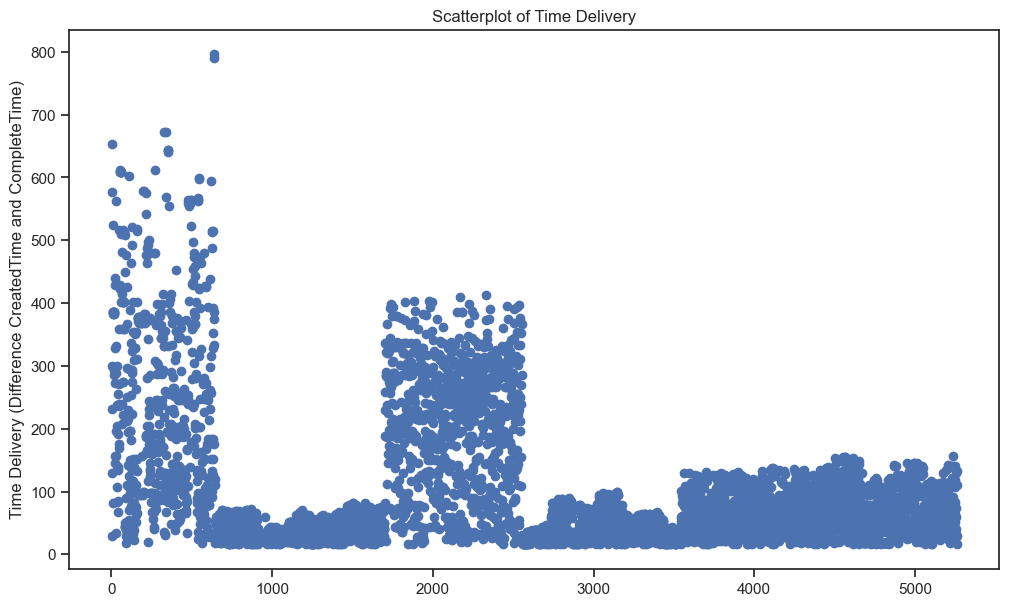

In [196]:
#Ploting response/dependent variable
respon = data_pred1['time_minutes_deliv_adjust']
ax = plt.gca()

obsall = list(range(1,len(respon)+1))
ax.scatter(obsall,respon)
ax.figure.set_size_inches(12,7)
ax.set_title('Scatterplot of Time Delivery', fontdict={'size':12})
ax.set(ylabel='Time Delivery (Difference CreatedTime and CompleteTime)')
plt.show()

The scatterplot show that the data response (time delivery) is not normal, so that linear model is not suitable for this case. In the next linear model will explain it.

In [201]:
#Define response (y) dan features/variables (X) and Splitting Training Testing Data
datay = data_pred1['time_minutes_deliv_adjust']
dataX = data_pred1[['branch_origin_code','branch_dest_code','weight','type_cod','amount_cod']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX,datay,test_size=0.3,random_state=123)

In [197]:
#Making Supervised Learning ==> Regression
#First, Modeling in simple linear
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

#predicting the testing data
y_prediction = LR.predict(X_test)
y_prediction

# importing r2_score module
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
print('mean_square_error_is',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

mean_square_error_is 9711.315048896306
root_mean_squared error of is== 98.54600473330365


In [198]:
#let check the multicolinearity
#So that, let see by statsmodels package
#Linear regression with statsmodel
import statsmodels.api as sm

X_train1, X_test1, y_train1, y_test1 = train_test_split(dataX, datay, test_size=0.3, random_state=0)

Xtrain = sm.add_constant(X_train1)
Xtest = sm.add_constant(X_test1)
X_train11=Xtrain.astype(float)
X_test11=Xtest.astype(float)

modelLR = sm.OLS(y_train1, X_train11).fit()
print_modelLR = modelLR.summary()
ypred = modelLR.predict(X_test11)
rmseLR = np.sqrt(mean_squared_error(y_test1,ypred))
mseLR = mean_squared_error(y_test1, ypred)

#MSE score
print('MSE Linear Regression:', mseLR)
print('RMSE Linear Regression:', rmseLR)
print('\nThe Summary Result:\n', print_modelLR)

MSE Linear Regression: 10012.640494330144
RMSE Linear Regression: 100.06318251150192

The Summary Result:
                                 OLS Regression Results                               
Dep. Variable:     time_minutes_deliv_adjust   R-squared:                       0.133
Model:                                   OLS   Adj. R-squared:                  0.131
Method:                        Least Squares   F-statistic:                     112.5
Date:                       Thu, 04 May 2023   Prob (F-statistic):          6.80e-111
Time:                               17:28:23   Log-Likelihood:                -22229.
No. Observations:                       3683   AIC:                         4.447e+04
Df Residuals:                           3677   BIC:                         4.451e+04
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                         coef    

The result of linear regression is very weak because the distribution of response (y) is non linier, so that we can apply Deep Learning/Neural Network for predicting the time delivery

# DEEP LEARNING for predicting the time delivery

In [222]:
from keras.models import Sequential
from keras.layers import Dense
 
X=dataX.values
y=datay.values

In [238]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler() 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

In [232]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [233]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=3, input_dim=5, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 5, epochs = 50, verbose=1)

Epoch 1/50
737/737 [==============================] - 2s 2ms/step - loss: 21224.5078
Epoch 2/50
737/737 [==============================] - 1s 2ms/step - loss: 20250.3125
Epoch 3/50
737/737 [==============================] - 1s 2ms/step - loss: 19508.6543
Epoch 4/50
737/737 [==============================] - 1s 2ms/step - loss: 18842.7168
Epoch 5/50
737/737 [==============================] - 1s 2ms/step - loss: 18225.0234
Epoch 6/50
737/737 [==============================] - 1s 2ms/step - loss: 17646.1777
Epoch 7/50
737/737 [==============================] - 1s 2ms/step - loss: 17102.1875
Epoch 8/50
737/737 [==============================] - 1s 2ms/step - loss: 16589.4180
Epoch 9/50
737/737 [==============================] - 1s 2ms/step - loss: 16111.4590
Epoch 10/50
737/737 [==============================] - 1s 2ms/step - loss: 15667.9609
Epoch 11/50
737/737 [==============================] - 1s 2ms/step - loss: 15254.0010
Epoch 12/50
737/737 [==============================] - 1s 2ms/s

In [219]:
# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)

In [220]:
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

50/50 [==============================] - 0s 2ms/step
1 Parameters: batch_size: 5 - epochs: 5 Accuracy: -32.49947479449733


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 1ms/step
2 Parameters: batch_size: 5 - epochs: 10 Accuracy: -39.06496371433633


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 1ms/step
3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 46.372193621891306


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 911us/step
4 Parameters: batch_size: 5 - epochs: 100 Accuracy: -36.89329193769626


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 1ms/step
5 Parameters: batch_size: 10 - epochs: 5 Accuracy: -35.54079482893994


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 1ms/step
6 Parameters: batch_size: 10 - epochs: 10 Accuracy: -34.83132611575331


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 2ms/step
7 Parameters: batch_size: 10 - epochs: 50 Accuracy: -37.575950220301706


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 2ms/step
8 Parameters: batch_size: 10 - epochs: 100 Accuracy: -39.036740784352446


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 2ms/step
9 Parameters: batch_size: 15 - epochs: 5 Accuracy: -33.32748143942973


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 2ms/step
10 Parameters: batch_size: 15 - epochs: 10 Accuracy: -35.84684531471527


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 967us/step
11 Parameters: batch_size: 15 - epochs: 50 Accuracy: -35.42829738920827


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 1ms/step
12 Parameters: batch_size: 15 - epochs: 100 Accuracy: -38.93623640789738


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 924us/step
13 Parameters: batch_size: 20 - epochs: 5 Accuracy: -30.78089759658178


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 883us/step
14 Parameters: batch_size: 20 - epochs: 10 Accuracy: -36.34857583428092


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 1ms/step
15 Parameters: batch_size: 20 - epochs: 50 Accuracy: -37.53637453015321


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


50/50 [==============================] - 0s 1ms/step
16 Parameters: batch_size: 20 - epochs: 100 Accuracy: -35.626162279632126


C:\Users\aisah\AppData\Local\Temp\ipykernel_21840\3646280550.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],


In [240]:
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 5, epochs = 50, verbose=0)
 
# Generating Predictions on testing data
Predictions=model.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
Predictions=Predictions
 
# Scaling the y_test Price data back to original price scale
y_test_orig=y_test
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data)
TestingData['Time_Deliv_Minutes']=y_test_orig
TestingData['Predicted_Time_Deliv_Minutes']=Predictions
TestingData.head()

50/50 [==============================] - 0s 1ms/step


,0,1,2,3,4,Time_Deliv_Minutes,Predicted_Time_Deliv_Minutes
0,-0.039863,0.033892,-0.294270,-0.533837,-0.279353,151,83.968155
1,0.294044,-1.224341,-0.294270,-0.533837,-0.279353,37,81.598923
2,-0.440553,0.088598,-0.404734,-0.533837,-0.279353,73,93.554314
3,-0.440553,1.346831,3.682422,-0.533837,-0.279353,70,75.172028
4,-0.440553,-1.333753,-0.437873,-0.533837,-0.279353,100,88.625542


**Predicting Result of Time Delivery**

In [242]:
# Computing the absolute percent error
APE=100*(abs(TestingData['Time_Deliv_Minutes']-TestingData['Predicted_Time_Deliv_Minutes'])/TestingData['Time_Deliv_Minutes'])
TestingData['APE']=APE

TestingData.head()

,0,1,2,3,4,Time_Deliv_Minutes,Predicted_Time_Deliv_Minutes,APE
0,-0.039863,0.033892,-0.294270,-0.533837,-0.279353,151,83.968155,44.391950
1,0.294044,-1.224341,-0.294270,-0.533837,-0.279353,37,81.598923,120.537629
2,-0.440553,0.088598,-0.404734,-0.533837,-0.279353,73,93.554314,28.156594
3,-0.440553,1.346831,3.682422,-0.533837,-0.279353,70,75.172028,7.388611
4,-0.440553,-1.333753,-0.437873,-0.533837,-0.279353,100,88.625542,11.374458


# MODELING 2: Timeseries modeling to forecast the count order everyday in each pairing origin and destination

In [81]:
#Preparing data time series in each pairing origin and destination
data_forecast= data.groupby(['taskCreated_date','branch_origin', 'branch_dest'])['taskId'].count().reset_index()
data_forecast

,taskCreated_date,branch_origin,branch_dest,taskId
0,2022-11-01,BDO,BTG,1
1,2022-11-01,BDO,BTJ,1
2,2022-11-01,BDO,DTB,1
3,2022-11-01,BDO,JBR,1
4,2022-11-01,BDO,KOE,1
...,...,...,...,...
1946,2022-11-10,TSM,KDR,1
1947,2022-11-10,UPG,BTG,1
1948,2022-11-10,UPG,GTO,1
1949,2022-11-10,UPG,TGR,1


Based on the data_forecast above, we know that the count of order in each pairing data (origin-destination) is small (not adequate due to **intermittent issue**) for forecast, so that the forecasting modeling only based on two variables which are (1) taskCreated_date, and (2) count of taskId.

In [88]:
#Preparing the forecast data
data_forecast2= data.groupby(['taskCreated_date'])['taskId'].count().reset_index()
data_forecast2

,taskCreated_date,taskId
0,2022-11-01,671
1,2022-11-02,802
2,2022-11-03,883
3,2022-11-04,882
4,2022-11-05,772
5,2022-11-06,532
6,2022-11-07,618
7,2022-11-08,543
8,2022-11-09,909
9,2022-11-10,954


#Actually forecasting modeling is not enough data, need more data. However, the following analysis for initial insigt

<AxesSubplot:xlabel='taskCreated_date', ylabel='taskId'>

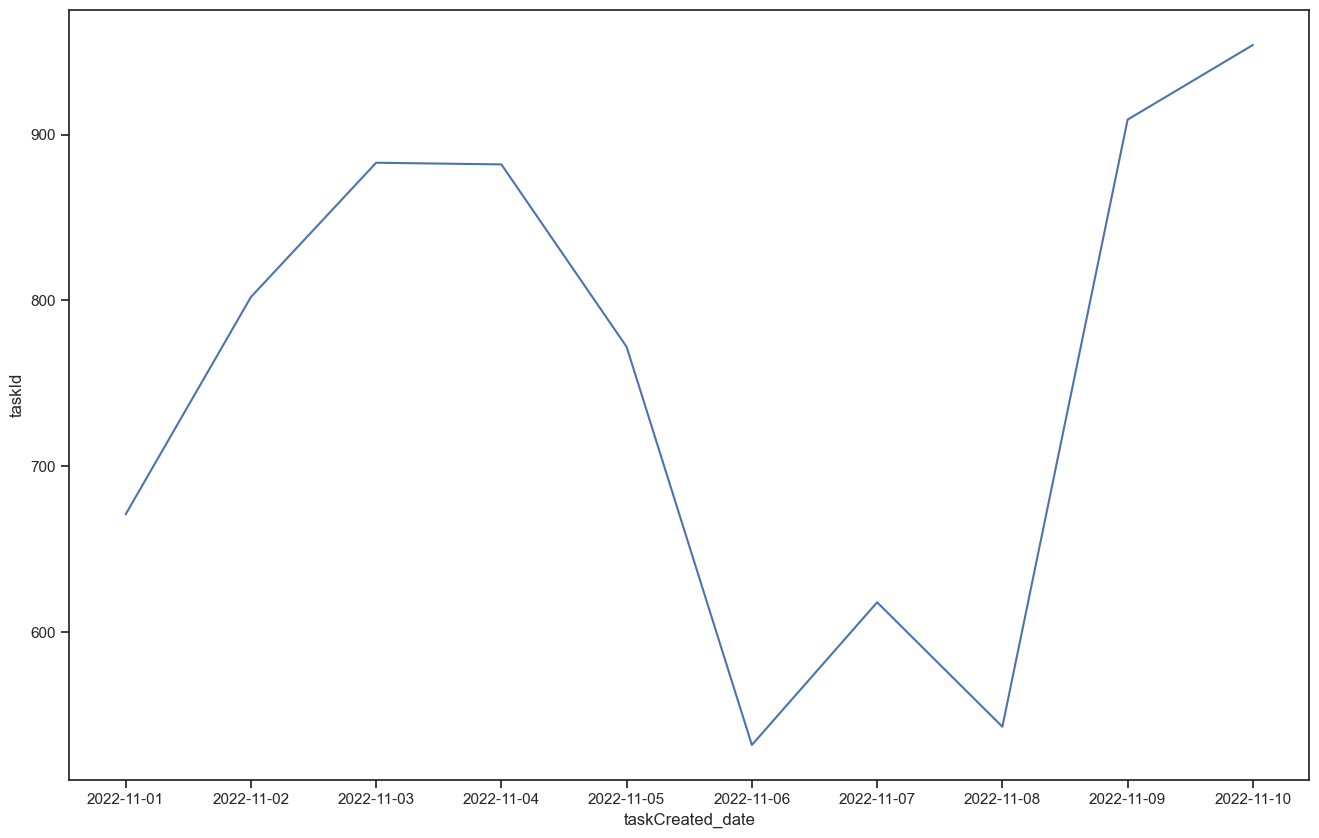

In [90]:
#Visualize first to know trend of data time series
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

#line plot
fig, ax = plt.subplots(figsize=(16,10))
sns.lineplot(x="taskCreated_date", y="taskId", data=data_forecast2)

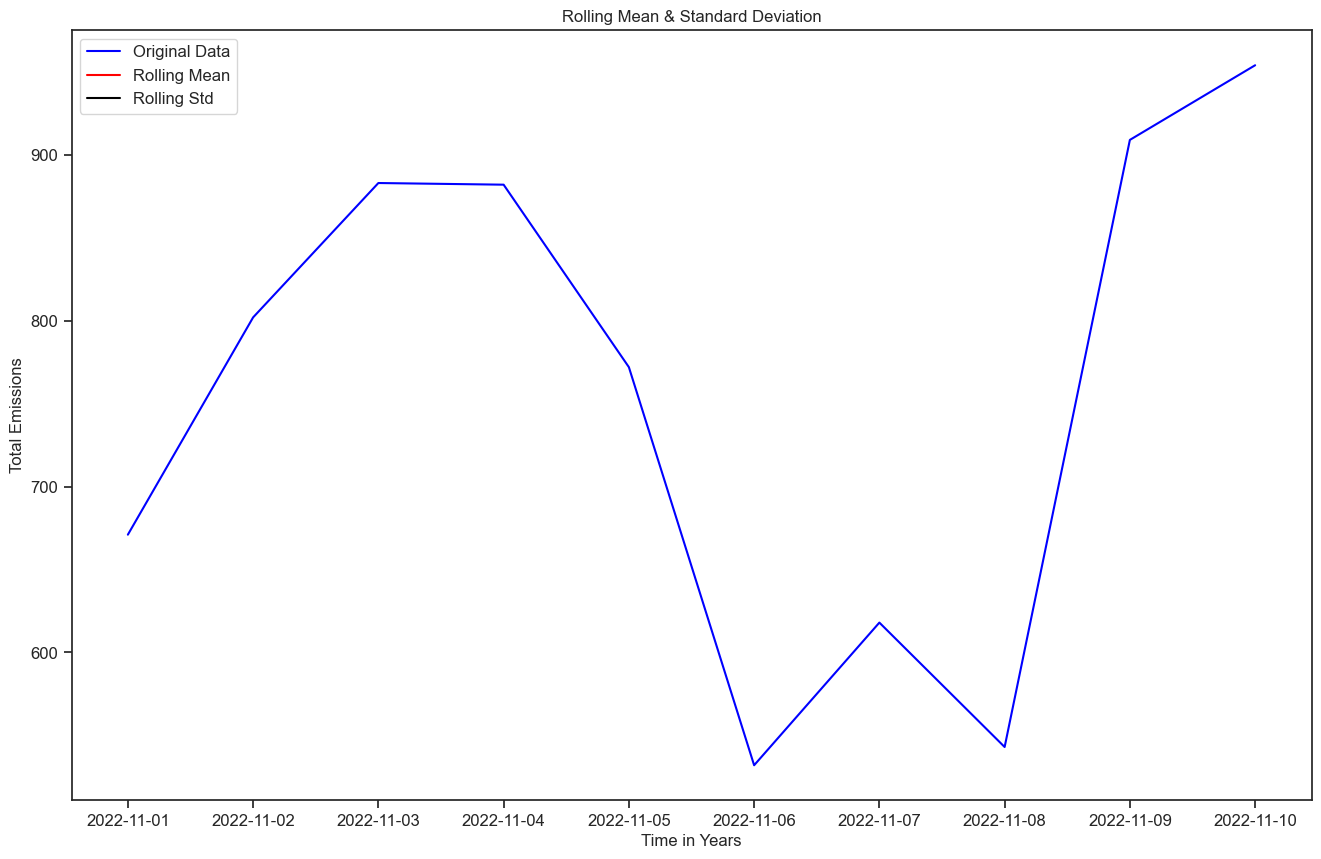

In [94]:
#Test Stationary
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

#Change dataframe to timeseries dataset
data_forecast_proper= data_forecast2.set_index('taskCreated_date')

def TestStationaryPlot(ts):
    rol_mean = ts.rolling(window = 12, center = False).mean()
    rol_std = ts.rolling(window = 12, center = False).std()
    
    plt.figure(figsize=(16, 10))
    plt.plot(ts, color = 'blue',label = 'Original Data')
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color ='black', label = 'Rolling Std')
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    
    plt.xlabel('Time in Years', fontsize = 12)
    plt.ylabel('Total Emissions', fontsize = 12)
    plt.legend(loc='best', fontsize = 12)
    plt.title('Rolling Mean & Standard Deviation', fontsize = 12)
    plt.show(block= True)

TestStationaryPlot(data_forecast_proper)

In [95]:
#Test stationary using Dickey-Fuller
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
TestStationaryAdfuller(data_forecast_proper)

Test Statistic                -5.050663
p-value                        0.000018
#Lags Used                     3.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


#Because of the data is stationary, so that it does not need diffencing of seasonal trend (it happen because the data only 10 days, data is big, the seasonal data usually occured)

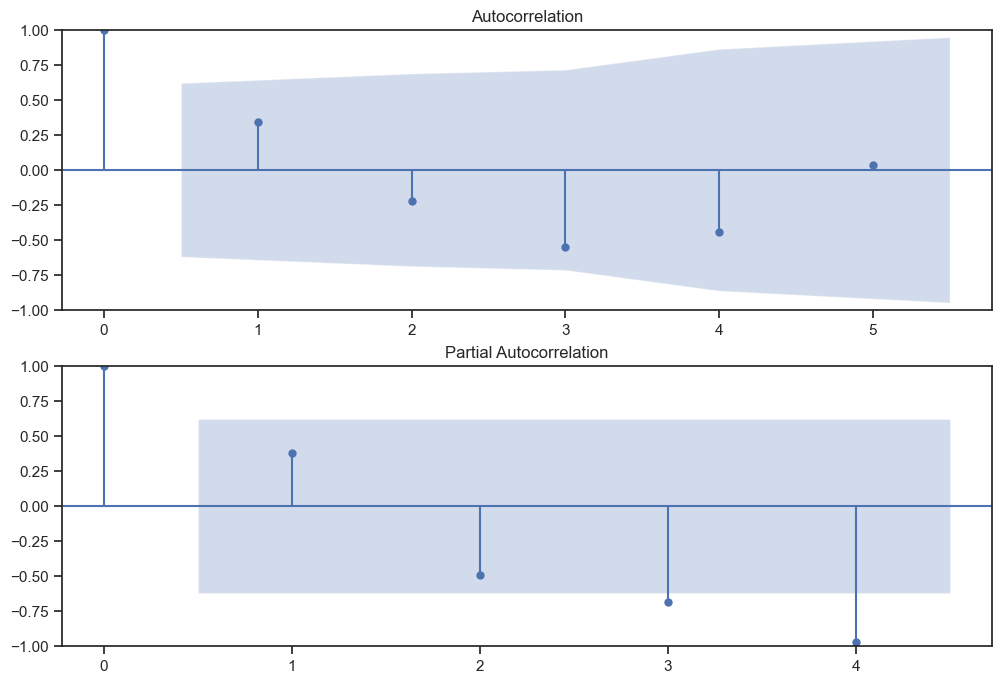

In [102]:
#Find optimal parameters and build ARIMA model
#Plot ACF dan PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_forecast_proper, lags=5, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_forecast_proper, lags=4, ax=ax2)

In [105]:
#Grid search for finding the optimal parameter
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] # Generate all different combinations of seasonal p, q and q triplets
print('Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], pdq_x_QDQs[1]))
print('SARIMAX: {} x {}'.format(pdq[2], pdq_x_QDQs[2]))

Examples of Seasonal ARIMA parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 1, 0) x (0, 1, 0, 12)


In [106]:
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
        try:
            mod = sm.tsa.statespace.SARIMAX(data_forecast_proper,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, seasonal_param, results.aic))
        except:
            continue

C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:147.4367311032759
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:4.0
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:2.0
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:4.0
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:6.0
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:4.0
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:6.0
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:125.56867672547024
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:6.0
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:4.0
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:6.0
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:8.0
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:6.0
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:8.0
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:106.66771916478157
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:4.0
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:2.0


C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarn

ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:4.0
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:6.0
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:4.0
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:6.0
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:96.29588752044235
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:6.0
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:4.0


C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarn

ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:6.0
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:8.0
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:6.0
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:8.0
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:121.26428223429754
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:6.0
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:4.0


C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarn

ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:6.0
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:6.0
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:8.0
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:6.0
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:8.0
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:110.64646071781013
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:8.0
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:6.0
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:8.0
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:8.0
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:10.0
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:8.0
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:10.0
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:108.66755408495436
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:6.0
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:4.0


C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarn

C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_mod

ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:6.0
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:8.0
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:6.0
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:8.0
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:98.19557836455104
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:8.0
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:6.0
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:8.0
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:10.0
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:8.0
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:10.0


C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarn

#Because amount data is so small, we will decide the ARIMA parameter based on ACF and PACF graph --> ARMA(0,4)

In [121]:
#Define the forecast model
mod = sm.tsa.statespace.SARIMAX(data_forecast_proper, 
                                order=(0,0,4),  
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 taskId   No. Observations:                   10
Model:               SARIMAX(0, 0, 4)   Log Likelihood                 -35.334
Date:                Thu, 04 May 2023   AIC                             80.667
Time:                        15:58:53   BIC                             78.715
Sample:                    11-01-2022   HQIC                            75.426
                         - 11-10-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.4628     36.628      0.040      0.968     -70.327      73.253
ma.L2          2.0519      2.656      0.773      0.440      -3.153       7.257
ma.L3          1.5103     29.556      0.051      0.9

C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\aisah\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


**The Result of Forecast of Count of Delivery Order per Days**

In [141]:
#Try forecast
forecast = results.get_prediction(start=10, end = 13, dynamic=False)
forecast_ci = forecast.predicted_mean
forecast_ci

2022-11-11    984.033241
2022-11-12    649.675432
2022-11-13    384.307497
2022-11-14     87.832701
Freq: D, Name: predicted_mean, dtype: float64

#because the time series only 10 days, so that the forecast result also limited only 4 days next for accuration result